<a href="https://colab.research.google.com/github/nawroz-m/ML_learning/blob/main/finding_the_best_learning_rate_NN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding the best learning rate
To find the best learning rate(the learning rate where the loss decrease the most during training) with the following steps:
* A learning rate **callback** - you can add a callback function while the model is training
* A modified loss curves plot.

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# import the circle dataset
from sklearn.datasets import make_circles
X, y = make_circles(1000, random_state=42, noise=0.03)

In [9]:
# Display datafarame of features and label
pd.DataFrame({'X0': X[:, 0], 'X': X[:, 1], 'Label': y}).head()

,X0,X,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


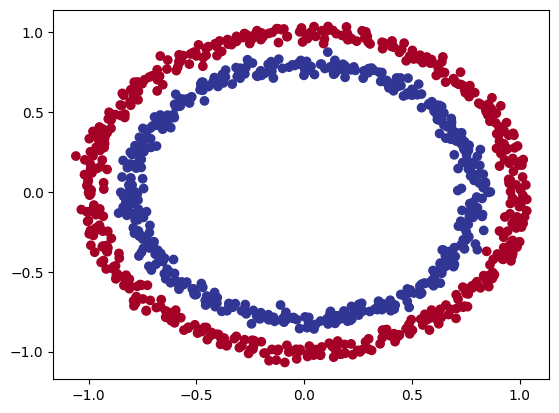

In [6]:
# Plot the fetaure dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [11]:
# Prepare the training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

## Create a classification model

In [12]:
import tensorflow as tf

In [91]:
tf.random.set_seed(42) # Make sure it's reprocedable
# 1. Create a model with no learning rate and 3 layers using Sequential API
m1 = tf.keras.Sequential([
    tf.keras.layers.Dense(40, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])
# 2. Compile the model with Adam optimizer without learning rate
m1.compile(optimizer=tf.keras.optimizers.Adam(),
           loss=tf.keras.losses.BinaryCrossentropy, # Since we are dealing with binary calssification we use binaryCorssentropy
           metrics=['accuracy'])
# 3. Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
"""
The scheduler function says to offer the learning rate scheduler, every epoch to travers a set of learning rate values starting from
'1e-4'(very small) and increasing by '10^(epoch/20)' every epoch
"""
# 4. Fit the model
h1 = m1.fit(X_train, y_train, epochs=100, verbose=0, callbacks=[lr_scheduler])
# 5. evalueate the model
m1.evaluate(X_test, y_test)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5093 - loss: 0.8700  


[0.8818265795707703, 0.5]

<Axes: title={'center': 'Model 1 Loss curve'}, xlabel='Epochs', ylabel='Loss'>

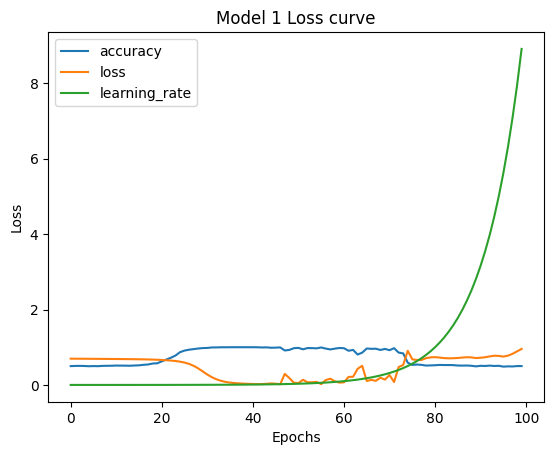

In [92]:
# Display the loss curve
pd.DataFrame(h1.history).plot(title="Model 1 Loss curve", xlabel="Epochs", ylabel="Loss")

Text(0.5, 1.0, 'Learning rate vs Loss')

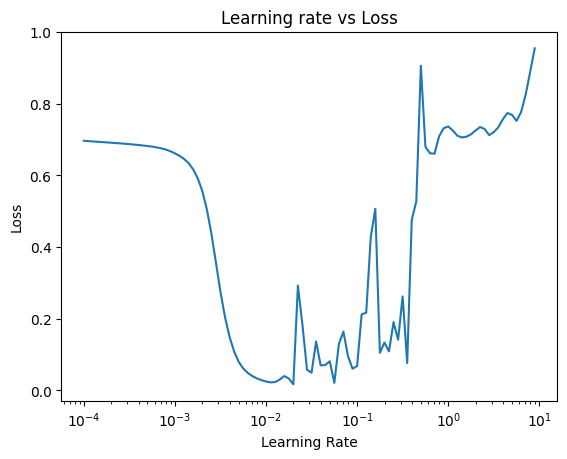

In [101]:
# Plot the learning rate value during training vs the loss
lrs = 1e-4 * 10**(tf.range(100)/20)
plt.semilogx(lrs, h1.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

# The Ideal learning rate is somewhere between the lowest point in the curve and about 10 times smaller than that curve

It seems the best learning rate will be **0.005**

In [33]:
# Typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

<Axes: >

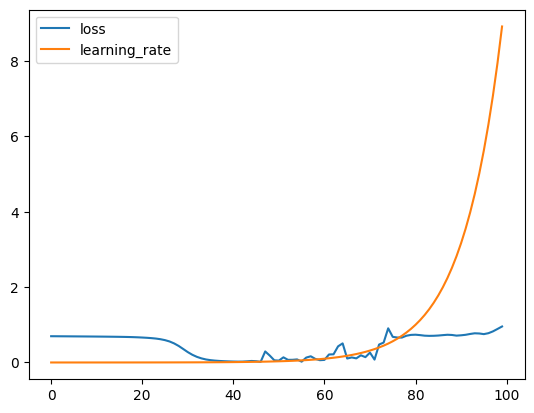

In [94]:
# Plot the learning rate value during training vs the loss
pd.DataFrame({'loss': h1.history['loss'], 'learning_rate':h1.history['learning_rate']}).plot()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/tmp/ipython-input-2751826335.py:18: UserWarning: The following kwargs were not used by contour: 'c'
  plt.contourf(xx, yy, y_pred, c=y_test, cmap=plt.cm.RdYlBu, alpha=0.5)


(-0.9677683182718436, 1.1360036756154805)

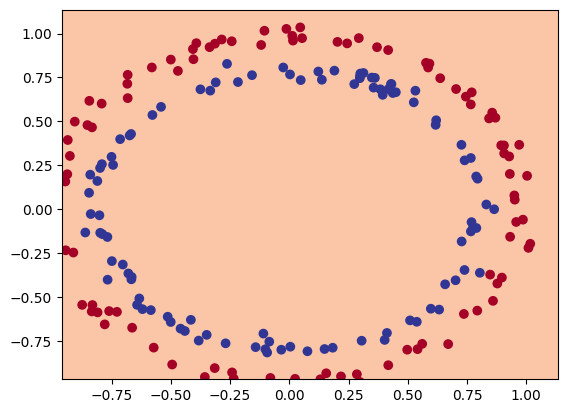

In [97]:
# Drow the decision boundry
# 1. Create the boundry
X_min, X_max = X[:, 0].min()+0.1, X[:, 0].max()+0.1
y_min, y_max = X[:, 1].min()+0.1, X[:, 1].max()+0.1
# 2. get the meshgrid
xx, yy = np.meshgrid(np.linspace(X_min, X_max, 100),
                     np.linspace(y_min, y_max, 100))
# 3. Create X to train on
X_in = np.c_[xx.ravel(), yy.ravel() ]
# 4. Predict the testing data
y_pred = m1.predict(X_in)
if len(y_pred[0])>1: # if the it's a two dimentinal calssification
  y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
else:
  y_pred = np.round(y_pred).reshape(xx.shape)

# 5. Plot the decision boundry
plt.contourf(xx, yy, y_pred, c=y_test, cmap=plt.cm.RdYlBu, alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

### As it showes in the decision boundry plot it's not even visible

# Let's create model with the learning rate we found **0.01**

In [107]:
tf.random.set_seed(42) # Make sure it's reprocedable
# 1. Create a model with the same as m1 but add learning rate of 0.01
m2 = tf.keras.Sequential([
    tf.keras.layers.Dense(40, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])
# 2. compile the model
m2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
           loss=tf.keras.losses.BinaryCrossentropy,
           metrics=['accuracy'])

# 3. Fit the model
h2 = m2.fit(X_train, y_train, epochs=100, verbose=0)
# 4. Evaluate the model
m2.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0035  


[0.0031402320601046085, 1.0]

In [108]:
m1.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5093 - loss: 0.8700 


[0.8818265795707703, 0.5]

<Axes: >

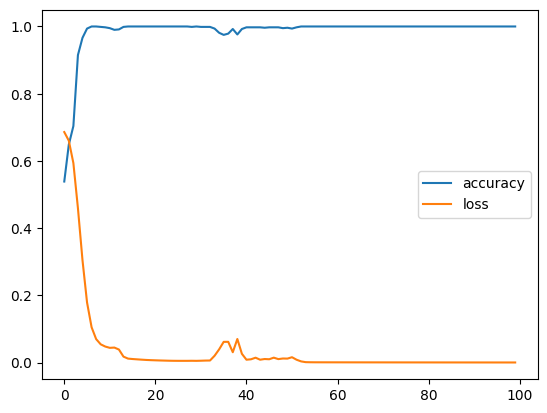

In [109]:
# Plot the loss curve
pd.DataFrame(h2.history).plot()

<Axes: >

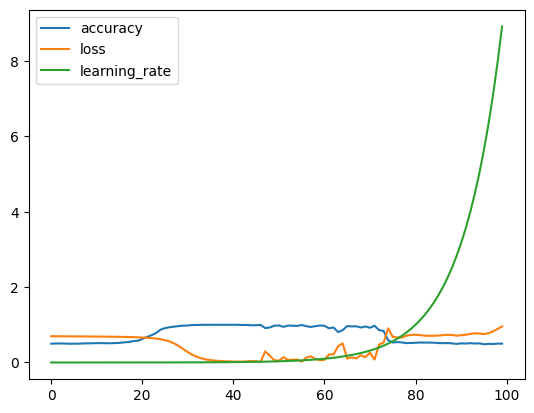

In [110]:
# Plot the loss curve
pd.DataFrame(h1.history).plot()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/tmp/ipython-input-480066388.py:18: UserWarning: The following kwargs were not used by contour: 'c'
  plt.contourf(xx, yy, y_pred, c=y_test, cmap=plt.cm.RdYlBu, alpha=0.7)


(-1.094527941956522, 1.1351578040814592)

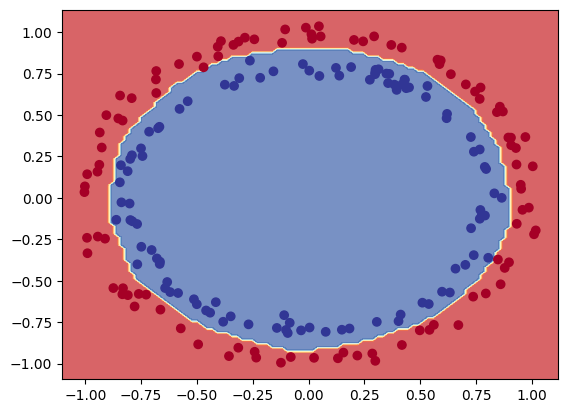

In [122]:
# Drow the Decision boundry for model 2
# 1. Create the boundry
X_min, X_max = X_test[:, 0].min()-0.1, X_test[:, 0].max()+0.1
y_min, y_max = X_test[:, 1].min()-0.1, X_test[:, 1].max()+0.1
# 2. Creat the meshgrid
xx, yy = np.meshgrid(np.linspace(X_min, X_max, 100),
                     np.linspace(y_min, y_max, 100))
# 3. Create the X value to predict
X_in = np.c_[xx.ravel(), yy.ravel()]
# 4. predict
y_pred = m2.predict(X_in)
# 5. Ajust the prediction shape
if len(y_pred[0])>1:
  y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
else:
  y_pred = np.round(y_pred).reshape(xx.shape)
# 6. Plot
plt.contourf(xx, yy, y_pred, c=y_test, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())